In [30]:
import pandas as pd

In [31]:
# Windows용 한글 폰트 지정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 기호 정상 표시 (음수 깨짐 방지)

plt.rcParams['axes.unicode_minus'] = False


In [33]:
last_df = pd.read_csv('data/model_df.csv')
last_df

,customer_unique_id,Recency,Frequency,Monetary,F_score,R_score,M_score,RFM_add_score,RFM_score,RFM_segment,churn,delay_days,total_days,approval_days,review_flag,review_length,review_score,response_time,order_status_binary,category_num
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,1,4,4,9,0.140591,Loyal Customer,1,-5.0,7.0,1.0,1,111.0,5.0,4.0,0,0.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,1,4,1,6,0.127001,Potential Loyalist,1,-5.0,4.0,1.0,0,0.0,4.0,0.0,0,0.0
2,0000f46a3911fa3c0805444483337064,537,1,86.22,1,1,2,4,0.160176,Needs Attention,0,-2.0,26.0,1.0,0,0.0,3.0,1.0,0,0.0
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,1,2,1,4,0.146557,Needs Attention,1,-12.0,21.0,1.0,1,12.0,4.0,1.0,0,0.0
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89,1,2,4,7,0.157744,Potential Loyalist,0,-8.0,14.0,1.0,0,0.0,5.0,4.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91460,fffcf5a5ff07b0908bd4e2dbc735a684,447,1,4134.84,1,1,5,7,0.190641,Potential Loyalist,0,-27.0,28.0,1.0,0,0.0,5.0,4.0,0,0.0
91461,fffea47cd6d3cc0a88bd621562a9d061,262,1,84.58,1,3,2,6,0.149078,Potential Loyalist,1,-3.0,31.0,1.0,0,0.0,4.0,5.0,0,0.0
91462,ffff371b4d645b6ecea244b27531430a,568,1,112.46,1,1,3,5,0.163299,Needs Attention,0,-30.0,15.0,1.0,0,0.0,5.0,2.0,0,0.0
91463,ffff5962728ec6157033ef9805bacc48,119,1,133.69,1,4,3,8,0.140999,Loyal Customer,1,-14.0,12.0,1.0,1,133.0,5.0,2.0,0,0.0


C:\Users\Playdata2\AppData\Local\Temp\ipykernel_21252\3301675360.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=last_df, x='delay_group', y='review_score', palette='Set2')


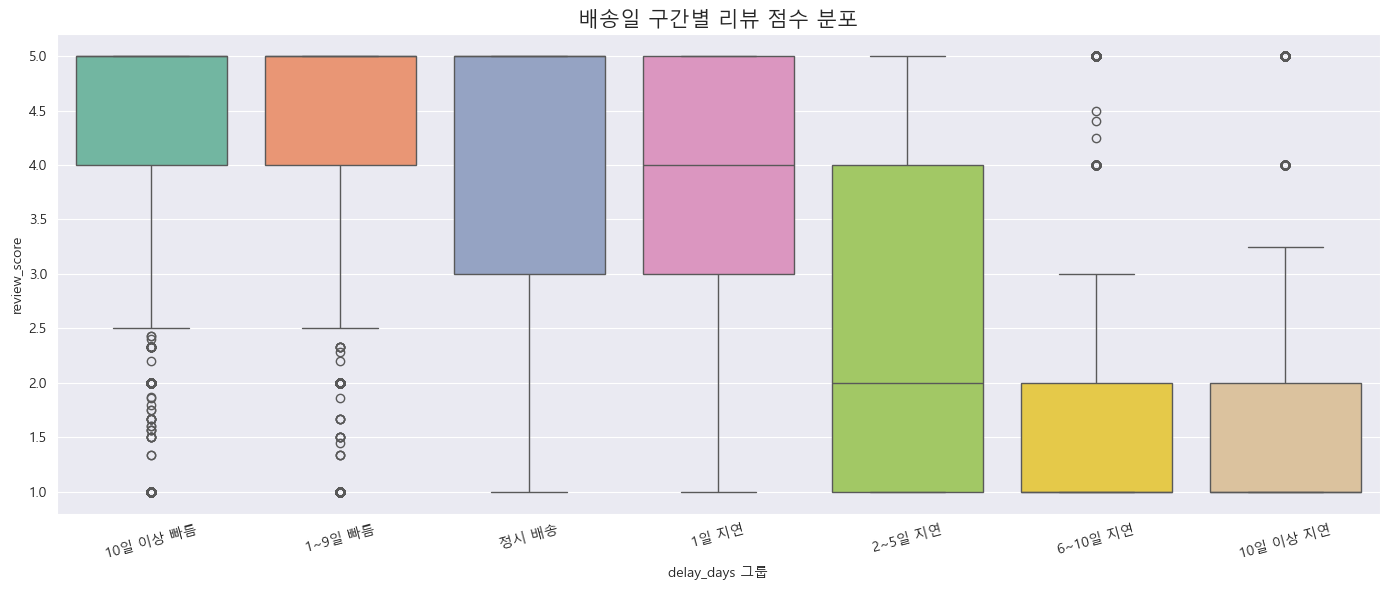

In [34]:
# delay_days 구간 설정
last_df['delay_group'] = pd.cut(
    last_df['delay_days'],
    bins=[-100, -10, -1, 0, 1, 5, 10, 100],
    labels=['10일 이상 빠름', '1~9일 빠름', '정시 배송', '1일 지연', '2~5일 지연', '6~10일 지연', '10일 이상 지연']
)

plt.figure(figsize=(14, 6))
sns.boxplot(data=last_df, x='delay_group', y='review_score', palette='Set2')
plt.title('배송일 구간별 리뷰 점수 분포', fontsize=15)
plt.xlabel('delay_days 그룹')
plt.ylabel('review_score')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


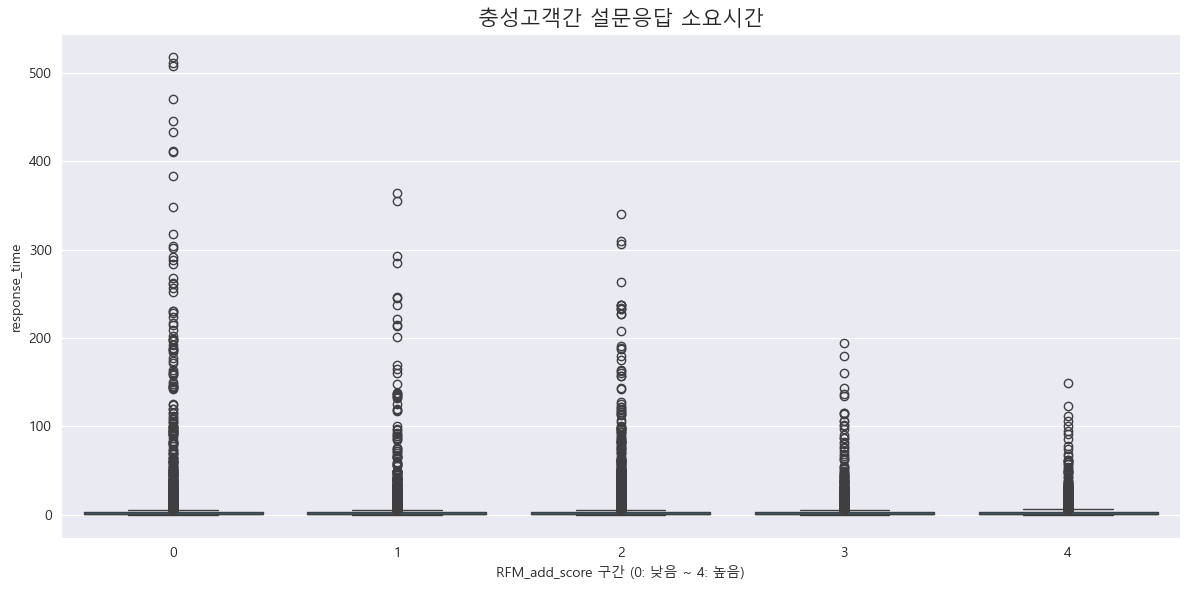

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# RFM_add_score를 구간으로 나누기 (예: 5개 구간)
last_df['RFM_score_bin'] = pd.qcut(last_df['RFM_add_score'], q=5, labels=False)

plt.figure(figsize=(12, 6))
sns.boxplot(x='RFM_score_bin', y='response_time', data=last_df)
plt.title('충성고객간 설문응답 소요시간', fontsize=15)
plt.xlabel('RFM_add_score 구간 (0: 낮음 ~ 4: 높음)')
plt.ylabel('response_time')
plt.tight_layout()
plt.show()

